In [1]:
### Run this cell before continuing.
library(tidyverse)
library(tidymodels)
library(tidyclust)
library(forcats)
library(repr)
library(lubridate)
library(dplyr)
options(repr.matrix.max.rows = 6)
#source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Read in the players.csv data using read_csv() and assign it to an object called players. The data is located within the data/ folder.


In [2]:
players <- read_csv("Data/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Read in the sessions.csv data using read_csv() and assign it to an object called sessions. The data is located within the data/ folder.

In [3]:
sessions <- read_csv("Data/sessions.csv")
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


Merge the datasets on hashedEmail using the inner_join() function. This is useful for combining player characteristics with their session data, which is essential to analyze how player behavior (from sessions.csv) relates to subscription status (from players.csv).

In [4]:
merged_data <- inner_join(players, sessions, by = "hashedEmail")
merged_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age,start_time,end_time,original_start_time,original_end_time
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,08/08/2024 00:21,08/08/2024 01:35,1.72308e+12,1.72308e+12
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,09/09/2024 22:30,09/09/2024 22:37,1.72592e+12,1.72592e+12
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,08/08/2024 02:41,08/08/2024 03:25,1.72308e+12,1.72309e+12
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,23/08/2024 21:39,23/08/2024 21:53,1.72445e+12,1.72445e+12
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,08/09/2024 19:40,08/09/2024 19:45,1.72582e+12,1.72582e+12
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA,08/05/2024 19:29,08/05/2024 19:44,1.71520e+12,1.71520e+12


View your new data frame, by using the glimpse() function.
Convert time strings to datetime objects and calculate session length in minutes.

In [5]:
glimpse(merged_data)

Rows: 1,535
Columns: 11
$ experience          <chr> "Pro", "Pro", "Pro", "Pro", "Pro", "Pro", "Pro", "…
$ subscribe           <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TR…
$ hashedEmail         <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0e…
$ played_hours        <dbl> 30.3, 30.3, 30.3, 30.3, 30.3, 30.3, 30.3, 30.3, 30…
$ name                <chr> "Morgan", "Morgan", "Morgan", "Morgan", "Morgan", …
$ gender              <chr> "Male", "Male", "Male", "Male", "Male", "Male", "M…
$ Age                 <dbl> 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,…
$ start_time          <chr> "08/08/2024 00:21", "09/09/2024 22:30", "08/08/202…
$ end_time            <chr> "08/08/2024 01:35", "09/09/2024 22:37", "08/08/202…
$ original_start_time <dbl> 1.72308e+12, 1.72592e+12, 1.72308e+12, 1.72598e+12…
$ original_end_time   <dbl> 1.72308e+12, 1.72592e+12, 1.72309e+12, 1.72598e+12…


In [9]:
merged_data_1 <-  merged_data |>
  mutate(
    start_time = dmy_hm(start_time), # parse start time
    end_time = dmy_hm(end_time), # parse end time
    session_length_min = as.numeric(difftime(end_time, start_time, units = "mins")) # session duration in minutes  
  )
merged_data_1

experience,subscribe,hashedEmail,played_hours,name,gender,Age,start_time,end_time,original_start_time,original_end_time,session_length_min
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2024-08-08 00:21:00,2024-08-08 01:35:00,1.72308e+12,1.72308e+12,74
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2024-09-09 22:30:00,2024-09-09 22:37:00,1.72592e+12,1.72592e+12,7
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,2024-08-08 02:41:00,2024-08-08 03:25:00,1.72308e+12,1.72309e+12,44
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,2024-08-23 21:39:00,2024-08-23 21:53:00,1.72445e+12,1.72445e+12,14
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,2024-09-08 19:40:00,2024-09-08 19:45:00,1.72582e+12,1.72582e+12,5
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA,2024-05-08 19:29:00,2024-05-08 19:44:00,1.71520e+12,1.71520e+12,15


Compute average session length and total number of sessions per player.
Add session level summary back to player dataset.

In [14]:
# Aggregate session info per player
session_summary <- merged_data_1 |>
  group_by(hashedEmail) |>
  summarize(avg_session_length_min = mean(session_length_min, na.rm = TRUE), 
  num_sessions = n()
  )
session_summary

# Merge session summary back to player-level data
player_data <- inner_join(players, session_summary, by = "hashedEmail")
player_data

hashedEmail,avg_session_length_min,num_sessions
<chr>,<dbl>,<int>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,53,2
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,30,1
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,11,1
⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15.46774,310
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,9.00000,1
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,72.00000,1


experience,subscribe,hashedEmail,played_hours,name,gender,Age,avg_session_length_min,num_sessions
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,74.77778,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,85.00000,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,5.00000,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,5.00000,1
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,29.83333,6
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA,15.00000,1


Keep only relevant columns and remove rows with missing data

In [15]:
model_data <- player_data |>
  select(subscribe, experience, played_hours, Age, gender, avg_session_length_min, num_sessions) |>
  drop_na()
model_data

subscribe,experience,played_hours,Age,gender,avg_session_length_min,num_sessions
<lgl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>
TRUE,Pro,30.3,9,Male,74.77778,27
TRUE,Veteran,3.8,17,Male,85.00000,3
FALSE,Veteran,0.0,17,Male,5.00000,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮
FALSE,Veteran,0.3,22,Male,21.00000,1
FALSE,Amateur,0.0,17,Prefer not to say,5.00000,1
FALSE,Amateur,2.3,17,Male,29.83333,6


Convert 'subscribe' column to a factor (needed for classification)

In [16]:
model_data <- model_data |>
  mutate(subscribe = as.factor(subscribe))
model_data

subscribe,experience,played_hours,Age,gender,avg_session_length_min,num_sessions
<fct>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>
TRUE,Pro,30.3,9,Male,74.77778,27
TRUE,Veteran,3.8,17,Male,85.00000,3
FALSE,Veteran,0.0,17,Male,5.00000,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮
FALSE,Veteran,0.3,22,Male,21.00000,1
FALSE,Amateur,0.0,17,Prefer not to say,5.00000,1
FALSE,Amateur,2.3,17,Male,29.83333,6


Split dataset into training (75%) and test (25%) sets, stratified by subscription outcome.

In [18]:
model_split <- initial_split(model_data, prop = 0.75, strata = subscribe)
model_split

model_train <- training(model_split)
model_train

model_test <- testing(model_split)
model_test

<Training/Testing/Total>
<92/31/123>

subscribe,experience,played_hours,Age,gender,avg_session_length_min,num_sessions
<fct>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>
FALSE,Amateur,0.0,21,Male,5,1
FALSE,Amateur,0.1,17,Female,12,1
FALSE,Veteran,0.1,18,Male,10,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮
TRUE,Veteran,0.1,17,Non-binary,11.00000,1
TRUE,Amateur,32.0,22,Male,29.94937,79
TRUE,Veteran,0.1,44,Female,11.00000,1


subscribe,experience,played_hours,Age,gender,avg_session_length_min,num_sessions
<fct>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>
FALSE,Veteran,0.0,17,Male,5,1
TRUE,Amateur,0.7,21,Female,50,1
TRUE,Amateur,0.1,17,Male,13,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮
TRUE,Amateur,0.8,22,Female,55.00000,1
FALSE,Veteran,0.3,22,Male,21.00000,1
FALSE,Amateur,2.3,17,Male,29.83333,6


Create preprocessing recipe.
Define preprocessing steps:
- handle unseen categories
- convert categorical vars to dummy vars
- remove predictors with zero variance
- normalize numerical predictors

In [19]:
model_recipe <- recipe(subscribe ~ ., data = model_train) |>
    step_novel(all_nominal_predictors()) |>
    step_dummy(all_nominal_predictors()) |>
    step_zv(all_predictors()) |> 
    step_normalize(all_numeric_predictors())
model_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 6



── Operations 

• Novel factor level assignment for: all_nominal_predictors()

• Dummy variables from: all_nominal_predictors()

• Zero variance filter on: all_predictors()

• Centering and scaling for: all_numeric_predictors()



Define a k-Nearest Neighbors classification model with k = 5

In [20]:
model_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
    set_engine("kknn") |>
    set_mode("classification")
model_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 5
  weight_func = rectangular

Computational engine: kknn 


Combine recipe and model into workflow and fit to training data

In [21]:
cleaned_data <- model_data |> 
    drop_na()
cleaned_data

model_fit <- workflow() |>
    add_recipe(model_recipe) |>
    add_model(model_spec) |>
    fit(data = model_train)
model_fit

subscribe,experience,played_hours,Age,gender,avg_session_length_min,num_sessions
<fct>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>
TRUE,Pro,30.3,9,Male,74.77778,27
TRUE,Veteran,3.8,17,Male,85.00000,3
FALSE,Veteran,0.0,17,Male,5.00000,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮
FALSE,Veteran,0.3,22,Male,21.00000,1
FALSE,Amateur,0.0,17,Prefer not to say,5.00000,1
FALSE,Amateur,2.3,17,Male,29.83333,6


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
4 Recipe Steps

• step_novel()
• step_dummy()
• step_zv()
• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(5,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3804348
Best kernel: rectangular
Best k: 5

Make predictions on test set and combine with true labels.

In [22]:
set.seed(2020) # DO NOT REMOVE

model_test_predictions <- predict(model_fit, model_test) |>
    bind_cols(model_test)
model_test_predictions

.pred_class,subscribe,experience,played_hours,Age,gender,avg_session_length_min,num_sessions
<fct>,<fct>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>
TRUE,FALSE,Veteran,0.0,17,Male,5,1
TRUE,TRUE,Amateur,0.7,21,Female,50,1
TRUE,TRUE,Amateur,0.1,17,Male,13,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
TRUE,TRUE,Amateur,0.8,22,Female,55.00000,1
TRUE,FALSE,Veteran,0.3,22,Male,21.00000,1
TRUE,FALSE,Amateur,2.3,17,Male,29.83333,6


Calculate accuracy and other metrics on test predictions.

In [23]:
set.seed(2020) # DO NOT REMOVE

model_prediction_accuracy <- model_test_predictions |>
    metrics(truth = subscribe, estimate = .pred_class)
model_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7419355
kap,binary,0.1079137


Create confusion matrix

In [24]:
set.seed(2020) # DO NOT REMOVE

model_mat <- model_test_predictions |>
    conf_mat(truth = subscribe, estimate = .pred_class)
model_mat

          Truth
Prediction FALSE TRUE
     FALSE     1    1
     TRUE      7   22

Create 5-fold cross-validation splits from training data (stratified)

In [25]:
set.seed(2020)

cleaned_data <- model_data |> 
    drop_na()
cleaned_data

model_vfold <- vfold_cv(model_train, v = 5, strata = subscribe)
print(model_vfold)

subscribe,experience,played_hours,Age,gender,avg_session_length_min,num_sessions
<fct>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>
TRUE,Pro,30.3,9,Male,74.77778,27
TRUE,Veteran,3.8,17,Male,85.00000,3
FALSE,Veteran,0.0,17,Male,5.00000,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮
FALSE,Veteran,0.3,22,Male,21.00000,1
FALSE,Amateur,0.0,17,Prefer not to say,5.00000,1
FALSE,Amateur,2.3,17,Male,29.83333,6


#  5-fold cross-validation using stratification 
# A tibble: 5 × 2
  splits          id   
  <list>          <chr>
1 <split [73/19]> Fold1
2 <split [73/19]> Fold2
3 <split [73/19]> Fold3
4 <split [74/18]> Fold4
5 <split [75/17]> Fold5


Fit k-NN model across CV folds

In [26]:
model_resample_fit <- workflow() |>
        add_recipe(model_recipe) |>
        add_model(model_spec) |>
        fit_resamples(resamples = model_vfold)
print(model_resample_fit)

# Resampling results
# 5-fold cross-validation using stratification 
# A tibble: 5 × 4
  splits          id    .metrics         .notes          
  <list>          <chr> <list>           <list>          
1 <split [73/19]> Fold1 <tibble [2 × 4]> <tibble [0 × 3]>
2 <split [73/19]> Fold2 <tibble [2 × 4]> <tibble [0 × 3]>
3 <split [73/19]> Fold3 <tibble [2 × 4]> <tibble [0 × 3]>
4 <split [74/18]> Fold4 <tibble [2 × 4]> <tibble [0 × 3]>
5 <split [75/17]> Fold5 <tibble [2 × 4]> <tibble [0 × 3]>


Collect average metrics (e.g. accuracy) across the 5 folds

In [27]:
model_metrics <- workflow() |>
        add_recipe(model_recipe) |>
        add_model(model_spec) |>
        fit_resamples(resamples = model_vfold) |>
        collect_metrics()
model_metrics

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.6286894,5,0.03157355,Preprocessor1_Model1
roc_auc,binary,0.4104396,5,0.02387488,Preprocessor1_Model1


Prepare a grid of k values (number of neighbors) to tune.

In [28]:
set.seed(2020)

model_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")
model_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


Tune k parameter using CV for each value from 1 to 10

In [29]:
set.seed(1234)

k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

model_results <- workflow() |>
        add_recipe(model_recipe) |>
        add_model(model_tune) |>
        tune_grid(resamples = model_vfold, grid = k_vals) |>
        collect_metrics()
print(model_results)

# A tibble: 20 × 7
   neighbors .metric  .estimator  mean     n std_err .config              
       <dbl> <chr>    <chr>      <dbl> <int>   <dbl> <chr>                
 1         1 accuracy binary     0.607     5 0.0444  Preprocessor1_Model01
 2         1 roc_auc  binary     0.488     5 0.0505  Preprocessor1_Model01
 3         2 accuracy binary     0.607     5 0.0444  Preprocessor1_Model02
 4         2 roc_auc  binary     0.440     5 0.0208  Preprocessor1_Model02
 5         3 accuracy binary     0.575     5 0.0353  Preprocessor1_Model03
 6         3 roc_auc  binary     0.47      5 0.0526  Preprocessor1_Model03
 7         4 accuracy binary     0.575     5 0.0353  Preprocessor1_Model04
 8         4 roc_auc  binary     0.443     5 0.0538  Preprocessor1_Model04
 9         5 accuracy binary     0.629     5 0.0316  Preprocessor1_Model05
10         5 roc_auc  binary     0.410     5 0.0239  Preprocessor1_Model05
11         6 accuracy binary     0.629     5 0.0316  Preprocessor1_Model06
12    

Extract only accuracy metric from tuning results.
Create line plot to visualize how accuracy changes with k.

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6069831,5,0.04439577,Preprocessor1_Model01
2,accuracy,binary,0.6069831,5,0.04439577,Preprocessor1_Model02
3,accuracy,binary,0.5748194,5,0.03527842,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
8,accuracy,binary,0.6713794,5,0.036982728,Preprocessor1_Model08
9,accuracy,binary,0.7277262,5,0.006151206,Preprocessor1_Model09
10,accuracy,binary,0.7277262,5,0.006151206,Preprocessor1_Model10


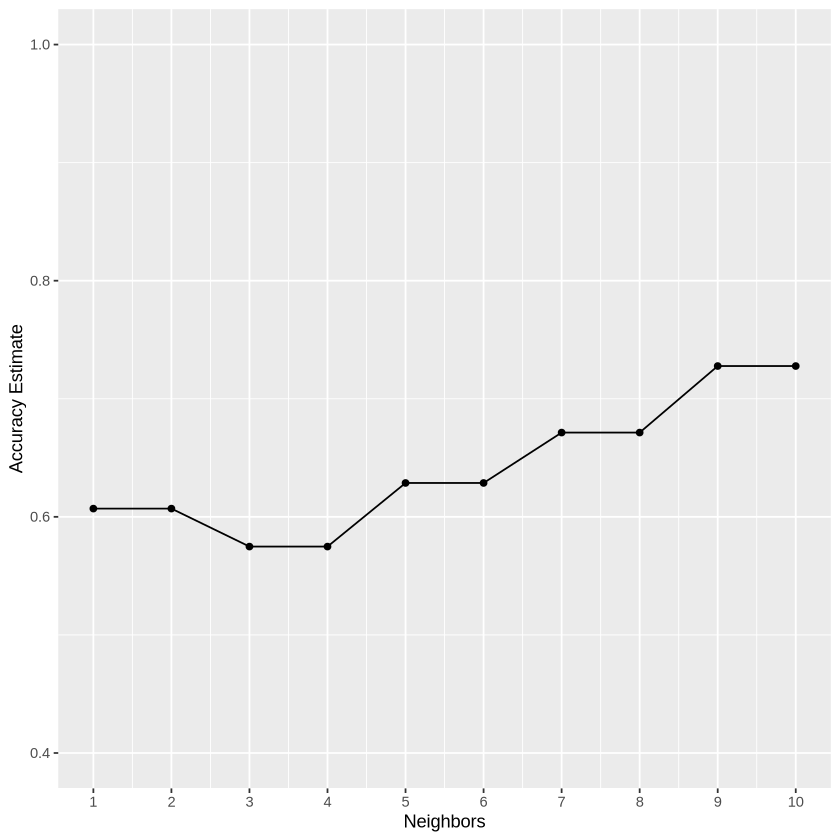

In [31]:
accuracies <- model_results |>
    filter(.metric == "accuracy")
accuracies

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() + 
    geom_line() + 
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
    scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis

accuracy_versus_k